In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
insurance_data=pd.read_csv("insurance.csv")

In [5]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
X=insurance_data.drop(columns=["charges"])
y=insurance_data["charges"]

X=pd.get_dummies(X,columns=["region"],drop_first=False,dtype=int)

X["sex"]=X["sex"].map({"female":1,"male":0})
X["smoker"]=X["smoker"].map({"yes":1,"no":0})

X["age_smoker"]=X["age"]*X["smoker"]
X["bmi_smoker"]=X["bmi"]*X["smoker"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

[20922596.528006196, 20921899.287567727, 20915761.34772444, 20909904.882848237, 20894930.88738714, 20879460.42907431, 20885116.38537385, 20939554.097556513, 21030365.00375737, 21137371.39625106, 22325946.521791276]


<Axes: >

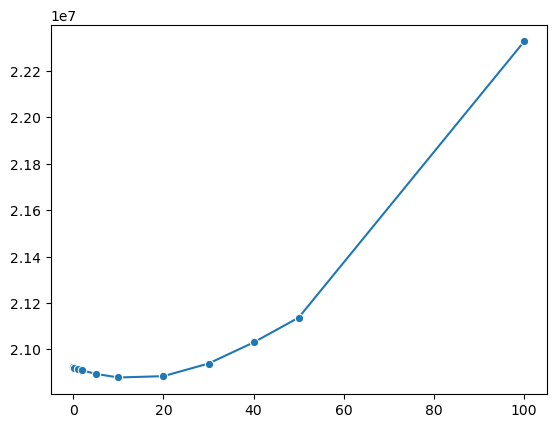

In [33]:
import seaborn as sns
alphas=[0.001,0.1,1,2,5,10,20,30,40,50,100]

mses=[]

for a in alphas:
    lasso_model=Lasso(alpha=a) #regularisation strength
    lasso_model.fit(X_train,y_train)

    y_pred=lasso_model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    

    mses.append(mse)

print(mses)
sns.lineplot(x=alphas,y=mses,marker="o")

In [43]:
from sklearn.linear_model import LassoCV

alphas=[0.001,0.1,1,2,5,10,20,30,40,50,100]

lasso_cv_model=LassoCV(alphas=alphas,
                      cv=5,
                      max_iter=1000,
                      random_state=42)

lasso_cv_model.fit(X_train,y_train)

print("best alpha:",lasso_cv_model.alpha_)

y_pred=lasso_cv_model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(r2)

best alpha: 0.001
20922596.528006196
0.8652317714485489
